# National Income Inequality Diagonstic

## Notebook - 3 - Inequality Trends & Exploration

**Objective:**
Analyze time trends in income inequality using the Gini Index,
with a focus on Germany and regional comparisons.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
gini = pd.read_csv("../data/processed/metadata_country_enriched.csv")
gini.head()

,country,country_code,year,gini,Region,income_group
0,United States,USA,1963.0,36.7,North America,High income
1,United States,USA,1964.0,37.4,North America,High income
2,United States,USA,1965.0,36.8,North America,High income
3,United States,USA,1966.0,37.1,North America,High income
4,United States,USA,1967.0,36.9,North America,High income


In [8]:
gini["year"].min(),gini["year"].max()

(1963.0, 2024.0)

In [9]:
germany = gini[gini["country"]=="Germany"].sort_values("year")

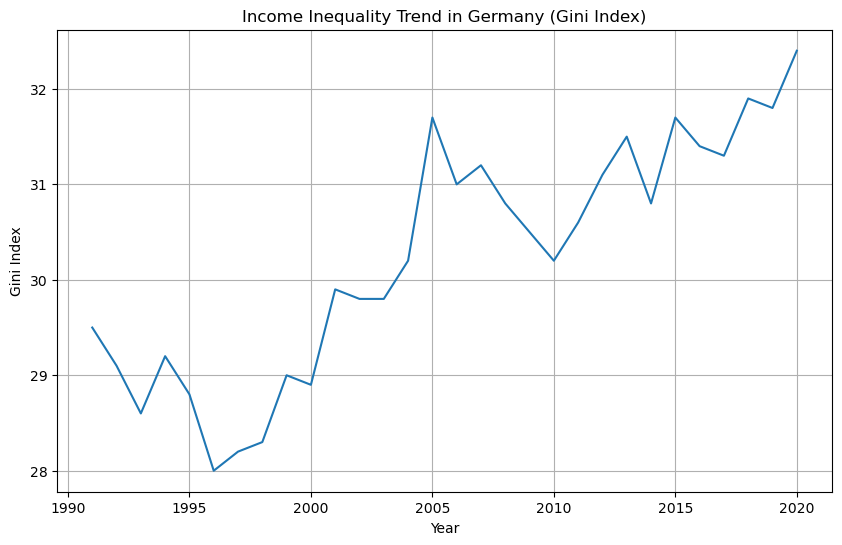

In [10]:
plt.figure(figsize=(10,6))
plt.plot(germany["year"],germany["gini"])
plt.title("Income Inequality Trend in Germany (Gini Index)")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.grid(True)
plt.show()

In [12]:
#Recent Years Focus (Policy-relevant)
germany_recent = germany[germany ["year"] >= 2000 ]

In [15]:
germany_recent["gini"].mean(), germany_recent["gini"].median()

# Mean > Median - occasional spikes
# Median > Mean - stable inequality

(np.float64(30.880952380952376), 31.0)

In [17]:
# regeion wise comparison
region_yearly = (
    gini.groupby(["Region","year"])["gini"].mean().reset_index()
)

In [27]:
# Select regions of interest
regions_of_interest = [
    "Europe & Central Asia",
    "South Asia",
    "Latin America & Caribbean"
]

region_filtered = region_yearly[
    region_yearly["Region"].isin(regions_of_interest)
]

region_filtered.head(5)

,Region,year,gini
41,Europe & Central Asia,1968.0,26.80
42,Europe & Central Asia,1969.0,27.90
43,Europe & Central Asia,1970.0,32.55
44,Europe & Central Asia,1971.0,29.30
45,Europe & Central Asia,1972.0,28.80


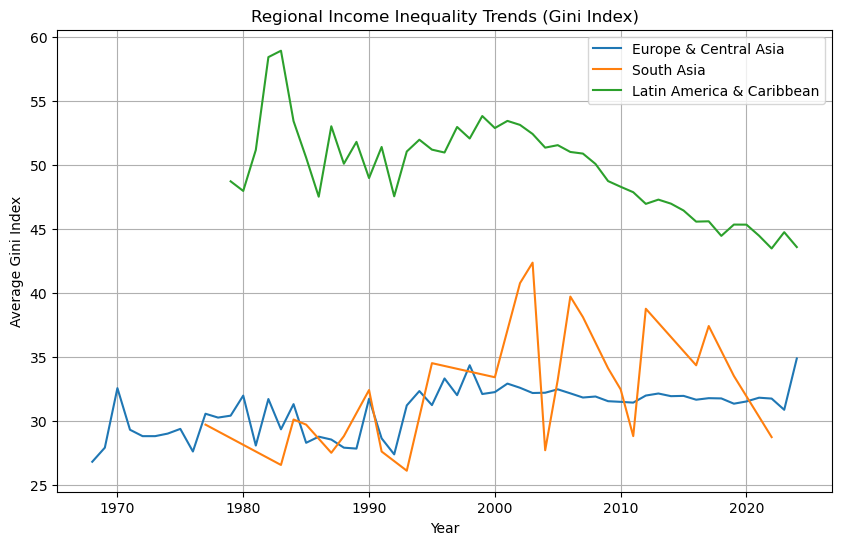

In [29]:
# Region wise trend plot
plt.figure(figsize=(10,6))
for region in regions_of_interest:
    subset = region_filtered[region_filtered["Region"] == region]
    plt.plot(subset["year"], subset["gini"], label=region)
    plt.title("Regional Income Inequality Trends (Gini Index)")
plt.xlabel("Year")
plt.ylabel("Average Gini Index")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Germany vs Region Average (Europe)
europe = region_yearly[
    region_yearly["Region"] == "Europe & Central Asia"
]

comparison = germany_recent.merge(
    europe,
    on="year",
    suffixes=("_germany", "_europe")
)

comparison.head()

,country,country_code,year,gini_germany,Region_germany,income_group,Region_europe,gini_europe
0,Germany,DEU,2000.0,28.9,Europe & Central Asia,High income,Europe & Central Asia,32.239286
1,Germany,DEU,2001.0,29.9,Europe & Central Asia,High income,Europe & Central Asia,32.904762
2,Germany,DEU,2002.0,29.8,Europe & Central Asia,High income,Europe & Central Asia,32.577419
3,Germany,DEU,2003.0,29.8,Europe & Central Asia,High income,Europe & Central Asia,32.169231
4,Germany,DEU,2004.0,30.2,Europe & Central Asia,High income,Europe & Central Asia,32.190698


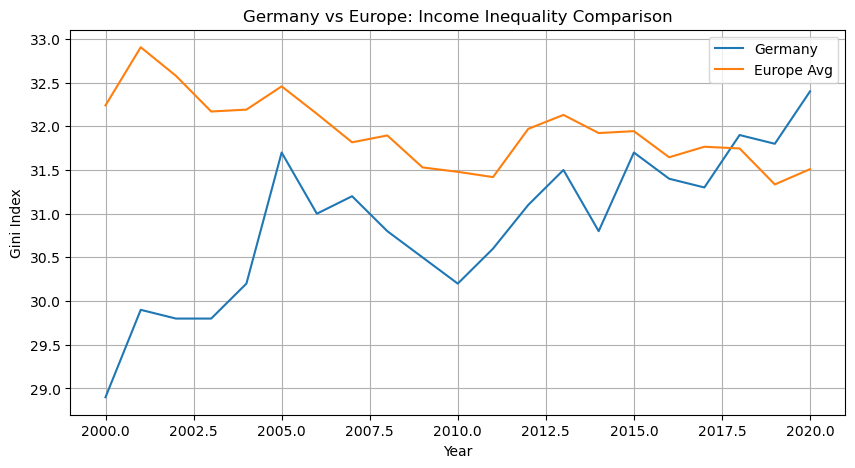

In [33]:
plt.figure(figsize=(10,5))
plt.plot(comparison["year"], comparison["gini_germany"], label="Germany")
plt.plot(comparison["year"], comparison["gini_europe"], label="Europe Avg")

plt.title("Germany vs Europe: Income Inequality Comparison")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.legend()
plt.grid(True)
plt.show()


## Initial Observations

- Germany shows a relatively stable inequality trend compared to other regions.
- Regional averages mask country-level variation.
- Mean Gini values can hide year-specific spikes.
- Aggregated indicators are useful for policy diagnostics but not micro-level modeling.
